In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os  # Add this line to import the os module

# Parameters
batch_size = 32
img_height = 32
img_width = 32
data_path = r"C:\Users\Acer nitro 5\number\cnn\embdata\data_split"

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_path, "train"),
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_path, "val"),
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_path, "test"),
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Print class names to verify
class_names = train_ds.class_names
print("Classes:", class_names)


Found 16495 files belonging to 36 classes.
Found 4145 files belonging to 36 classes.
Found 1008 files belonging to 36 classes.
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


8
8
20
19
7
25
10
29
10


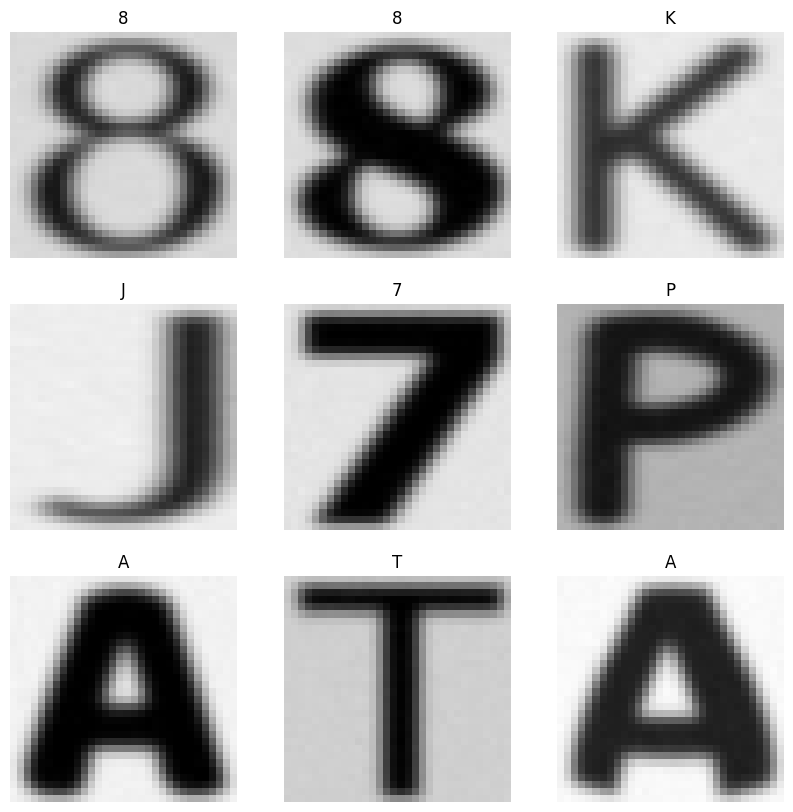

In [2]:
import matplotlib.pyplot as plt

# Display a sample batch of images with labels
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        print(labels[i].numpy())  # Print numeric label for each image
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [3]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [5]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize images
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)  # Output layer for classification
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


F:\numproject\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,428 (622.77 KB)

 Trainable params: 159,428 (622.77 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 20  # Set your desired number of epochs
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5735 - loss: 1.5899 - val_accuracy: 0.9312 - val_loss: 0.2772
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9453 - loss: 0.1878 - val_accuracy: 0.9457 - val_loss: 0.1922
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9559 - loss: 0.1333 - val_accuracy: 0.9472 - val_loss: 0.1812
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9631 - loss: 0.0998 - val_accuracy: 0.9597 - val_loss: 0.1563
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9742 - loss: 0.0719 - val_accuracy: 0.9489 - val_loss: 0.1828
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9763 - loss: 0.0616 - val_accuracy: 0.9568 - val_loss: 0.1660
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9786 - loss: 0.0488 - val_accuracy: 0.9602 - val_loss: 0.1506
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9795 - loss: 0.0488 - val_accuracy:

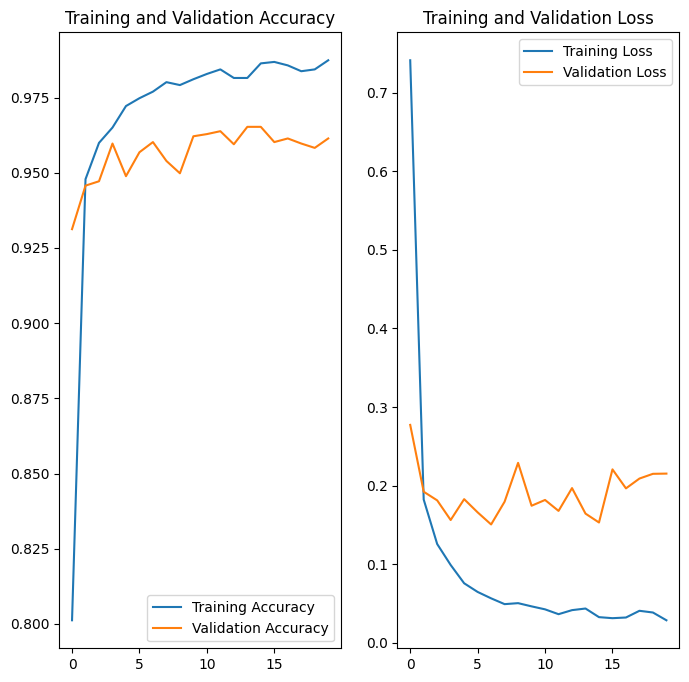

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [22]:
import numpy as np

# Replace with your own image path
img_path = r"C:\Users\Acer nitro 5\Number\dataset\nepali_split\३_298.jpg"
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 45ms/step
This image most likely belongs to 3 with a 96.18 percent confidence.


In [8]:
model.save(r"C:\Users\Acer nitro 5\number\cnn\embbmod.h5")


In [9]:
model.save(r"C:\Users\Acer nitro 5\number\cnn\embmod.keras")


In [11]:
import numpy as np
import tensorflow as tf  # Import TensorFlow

# Load the model
model_path = r"C:\Users\Acer nitro 5\number\cnn\embbmod.h5"
model = tf.keras.models.load_model(model_path)

# Define image height and width as per the model's expected input size
img_height, img_width = 32, 32  # Change to 32 for your model

# Replace with your own image path
img_path = r"C:\Users\Acer nitro 5\number\cnn\embdata\test\Screenshot 2024-11-21 151748.png"

# Load and preprocess the image
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Define your class names
class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'
]
# Print the most likely class and confidence
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
This image most likely belongs to 0 with a 78.03 percent confidence.
